# generate feature list
```
python3 gen_feat.py --inf_list toy_imgs/img.list --feat_list toy_imgs/feat.list --resume magface_epoch_00025.pth
```

In [71]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white") 
%matplotlib inline

# Visualize magnitudes (qualities)

In [72]:
def imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
def show(idx_):
    imgname = imgnames[idx_]
    img = cv2.imread(imgname)
    imshow(img)
    print(img_2_mag[imgname], imgname) 

with open('OneImage/d04201/feat.list', 'r') as f:
    lines = f.readlines()   

img_2_feats = {}
img_2_mag = {}
for line in lines:
    parts = line.strip().split(' ')
    imgname = parts[0]
    feats = [float(e) for e in parts[1:]]
    mag = np.linalg.norm(feats)
    img_2_feats[imgname] = feats/mag
    img_2_mag[imgname] = mag

imgnames = list(img_2_mag.keys())
mags = [img_2_mag[imgname] for imgname in imgnames]
sort_idx = np.argsort(mags[1:]) + 1
sort_idx = np.insert(sort_idx, 0, 0)

In [73]:
H, W = 112, 112
NH, NW = 1, 11
canvas = np.zeros((NH * H, NW * W, 3), np.uint8)

for i, ele in enumerate(sort_idx):
    imgname = '/'.join(imgnames[ele].split('/')[-2:])
    img = cv2.imread(imgname)
    # canvas[int(i / NW) * H: (int(i / NW) + 1) * H, (i % NW) * W: ((i % NW) + 1) * W, :] = img    

[24.58, 15.34, 15.89, 16.34, 16.34, 16.64, 17.31, 17.87, 18.16, 18.39, 18.7, 18.8, 18.81, 18.86, 19.11, 19.18, 19.61, 19.98, 20.01, 20.05, 20.19, 20.22, 20.25, 20.31, 20.41, 20.42, 20.46, 20.55, 20.71, 20.74, 20.78, 20.85, 20.86, 20.92, 20.95, 21.0, 21.06, 21.14, 21.19, 21.24, 21.29, 21.36, 21.41, 21.42, 21.45, 21.47, 21.52, 21.53, 21.61, 21.63, 21.64, 21.64, 21.64, 21.66, 21.68, 21.73, 21.76, 21.8, 21.83, 21.84, 21.85, 21.87, 21.9, 21.91, 21.93, 21.96, 21.97, 21.97, 22.0, 22.05, 22.05, 22.05, 22.06, 22.08, 22.1, 22.1, 22.11, 22.11, 22.11, 22.14, 22.14, 22.15, 22.16, 22.17, 22.18, 22.18, 22.27, 22.29, 22.3, 22.34, 22.35, 22.35, 22.36, 22.37, 22.4, 22.4, 22.4, 22.4, 22.41, 22.41, 22.47, 22.47, 22.47, 22.47, 22.5, 22.51, 22.53, 22.55, 22.55, 22.57, 22.57, 22.58, 22.58, 22.61, 22.61, 22.63, 22.63, 22.63, 22.65, 22.65, 22.65, 22.66, 22.69, 22.7, 22.71, 22.72, 22.74, 22.76, 22.78, 22.8, 22.8, 22.81, 22.82, 22.83, 22.84, 22.84, 22.85, 22.86, 22.88, 22.89, 22.9, 22.91, 22.93, 22.94, 22.94, 22

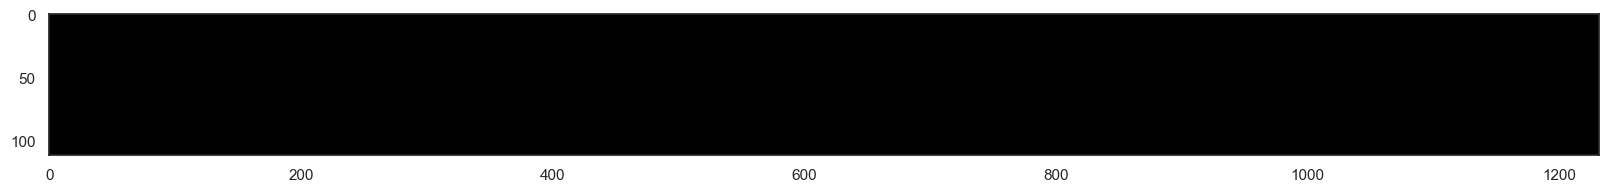

In [74]:
plt.figure(figsize=(20, 20))
print([float('{0:.2f}'.format(mags[idx_])) for idx_ in sort_idx])
imshow(canvas)

# visualize recognition

In [75]:
feats = np.array([img_2_feats[imgnames[ele]] for ele in sort_idx])
sim_mat = np.dot(feats, feats.T)

In [89]:
# print(sim_mat[0])
print()
# the simmilarities in relation to the reference picture
my_list = sim_mat.tolist()[0]  # Replace with your actual list
file_path = "refences_d04201.txt"  # Replace with your desired file path
print(my_list)
with open(file_path, "w") as file:
    for item in my_list:
        file.write(str(item) + "\n")


[0.9999999999999997, 0.00248050636220961, -0.11303996660217258, -0.03728534336469707, -0.029194619563505095, 0.029515940872589883, -0.02722080174420171, -0.055089585831219104, -0.011506854707128452, 0.04893428699252764, -0.056093808357652514, -0.05278945909414183, 0.1195941941920579, -0.1018322830096675, -0.034239249558142254, 0.004630465189235523, 0.21019342518107112, -0.02329936899350039, 0.26643978792040507, 0.34184594449916583, 0.17103210040194355, 0.20095733377105224, 0.19196328308543703, 0.16259622767659104, 0.3213885894846954, 0.3776052165616896, 0.40596471583512556, -0.04191673624521163, -0.02152445169294557, 0.14758441875545453, 0.4509618173613264, 0.4489403908986695, 0.06555505379154068, 0.4827082945129987, 0.04804559385025146, 0.2650854933430331, 0.3691869728602923, 0.46865967818903115, 0.5208900660452752, 0.6291259546185637, 0.42534987616029063, 0.5724251288487144, 0.30231103474096527, 0.4366129632434673, 0.3449333574166742, 0.35181535074067566, 0.4076594608652282, 0.27531

TypeError: unsupported operand type(s) for +: 'float' and 'str'

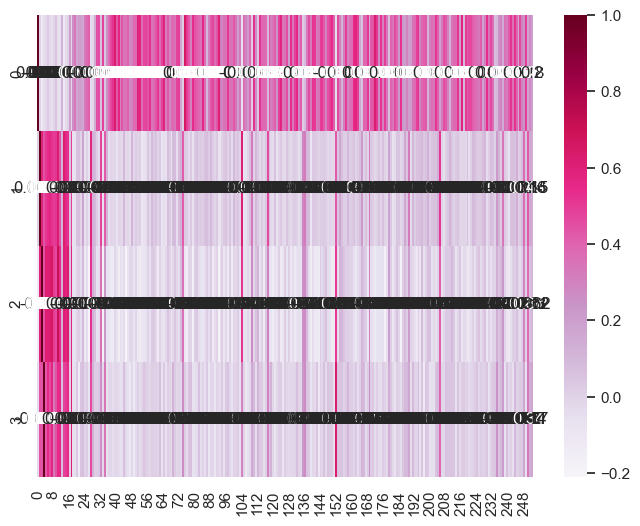

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))  
ax = sns.heatmap(sim_mat[0:4][0:4], cmap="PuRd", annot=True)